In [1]:
import sys

PACKAGE_PARENT = '../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
import ppo_training_configs as PPOCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_config
env = PPOCONFIGS.env

In [ ]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
actor_path = ''
critic_path = ''
paths = [actor_path, critic_path]
agent_trained.load_model(paths)


eps = 2
base_dir_path = "./"
RENDER = True
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
running_avg_len = 100
running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)




In [ ]:
print("average reward per episode :", sum(rewards) / len(rewards))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward Value')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()

In [5]:
# load training data

import pickle

data_path_1 = '../../../../PPO_cartpole_data_cont/gamma_0.99_alpha_0.0003_reward_431.8_data.pkl'
# data_path_2 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_data.pkl'
# data_path_3 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_data.pkl'
with open(data_path_1, 'rb') as f:
    data1 = pickle.load(f)



train_rewards_1 = data1['rewards']
train_rewards = []
train_rewards.extend(train_rewards_1)
train_avg_rewards_1 = data1['avg_rewards']
train_avg_rewards = []
train_avg_rewards.extend(train_avg_rewards_1)

431.82
average reward per episode= 367.1993


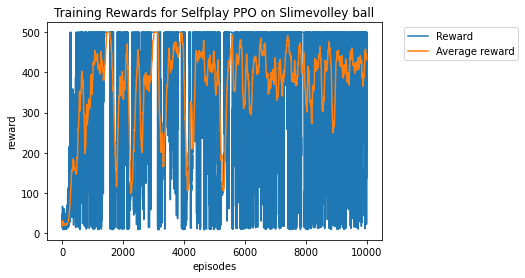

In [6]:
print(train_avg_rewards[-1])
train_rewards = np.array(train_rewards)
plt.plot(train_rewards, label='Reward')
plt.plot(train_avg_rewards, label='Average reward')
plt.title('Training Rewards for Selfplay PPO on Slimevolley ball')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(train_rewards)))
plt.show()